**************************************
# **2a. Prova Prática de SCC275- Ciência de Dados**
## SCC - ICMC - USP
## **Profa. Roseli Ap. Francelin Romero**

2o. semestre de 2023
**************************************
Vamos utilizar o conjunto de dados do UCI **Heart disease**.
Ele descreve algumas características de pacientes e como atributo alvo, a classe, se o paciente tem doença cardíaca ou não. No total o conjunto possui 13 atributos e 1 alvo:

**Atributo Definição Valor**

- age (Idade do paciente)
- sex (sexo do paciente)
- cp (Tipo de dor no peito)
- trestbps (Pressão sanguínea em repouso)
- chol (Colesterol em mg/dl)
- fbs (Taxa de açucar no sangue > 120 mg/dl)
- restecg (Resultado do ECG em repouso)
- thalach (Taxa de batimentos máxima)
- exang (Angina induzida por exercício)
- oldpeak = Depressão ST induzida por exercicio relativo a descanso.
- slope (o declive do pico ST)
- ca (número de veias colorizadas por fluoroscopia)
- thal: 1 = normal; 2 = fixed defect; 3 = reversable defect
- target (possui problema cardíaco ou não)

Nome: Roger Rafael Serqueira de Souza Nº: 11895006
Nome: Danilo Carneiro Oliveira Nº: 10259985


1. **EXPLORAÇÃO de DADOS**(EDA)
**a)** Analise os atributos sex, age, chol, thalac, restecg, utilizando o **bar plot** (matplotlib.pyplot.bar ou seaborn.barplot)  para cada atributo.

**b)** Formule pelo menos 3 hipóteses baseado no item a). Por exemplo, o atributo Age não influi no valor do colesterol.

**c)** Reanalise as medidas do item a) por **classe**, isto é, faça o Boxplot por classe e atributos ou de maneira que o ajude a responder suas perguntas. Scatterplot, correlação e pairplot (seaborn) podem ajudar.

**d)** Reanalise suas perguntas (hipóteses), é possível respondê-las com a análise realizada? Escreva suas conclusões.
Caso não seja possível, pense nos motivos, falta de atributos, poucos dados, necessidade de EDA mais profunda?



In [90]:
import pandas as pd

dados = pd.read_csv("clv_heart_disease.data")

print(data.columns)

Index(['Unnamed: 0', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


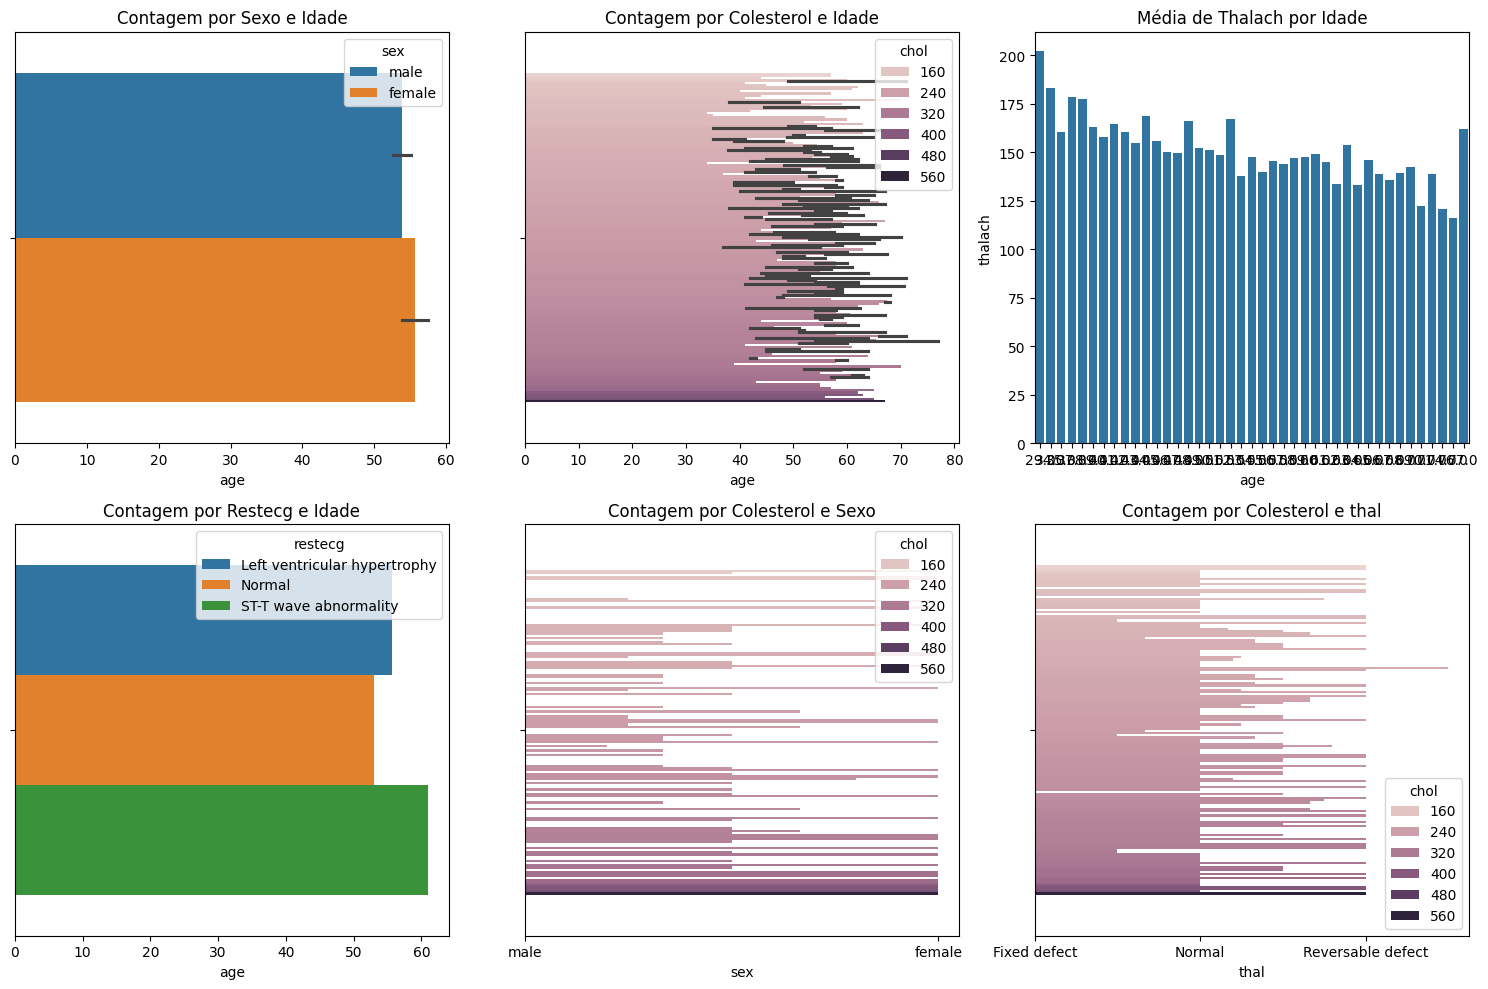

' Resposta Pergunta b: Acredito que a própria idade seja um bom indicativo para a contagem de colesterol\n    \n    parece que com a maior idade, a taxa de alta do número do colesterol aumenta, portanto acredito que a idade seja forte indicativo para alta taxa de colesterol\n\n    alem disso fui testando outros classificadores para ocorrencia do colesterol, e acredito que o sexo e thal sejam maiores indicadores para o colesterol\n '

In [91]:
#Item A e B - Pergunta 1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.barplot(x='age', hue='sex', data=dados)
plt.title('Contagem por Sexo e Idade')

plt.subplot(2, 3, 2)
sns.barplot(x='age', hue='chol', data=dados)
plt.title('Contagem por Colesterol e Idade')

plt.subplot(2, 3, 3)
sns.barplot(x='age', y='thalach', data=dados, errorbar=None)
plt.title('Média de Thalach por Idade')

plt.subplot(2, 3, 4)
sns.barplot(x='age', hue='restecg', data=dados, errorbar=None)
plt.title('Contagem por Restecg e Idade')

#-----------------------------------------------------------------------------------
plt.subplot(2, 3, 5)
sns.barplot(x='sex', hue='chol', data=dados, errorbar=None)
plt.title('Contagem por Colesterol e Sexo')
#-------------------------------------------------------------------------------------
plt.subplot(2, 3, 6)
sns.barplot(x='thal', hue='chol', data=dados, errorbar=None)
plt.title('Contagem por Colesterol e thal')


plt.tight_layout()

plt.show()
#-------------------------------------------------------------------------------
''' Resposta Pergunta b: Acredito que a própria idade seja um bom indicativo para a contagem de colesterol
    
    parece que com a maior idade, a taxa de alta do número do colesterol aumenta, portanto acredito que a idade seja forte indicativo para alta taxa de colesterol

    alem disso fui testando outros classificadores para ocorrencia do colesterol, e acredito que o sexo e thal sejam maiores indicadores para o colesterol
 '''


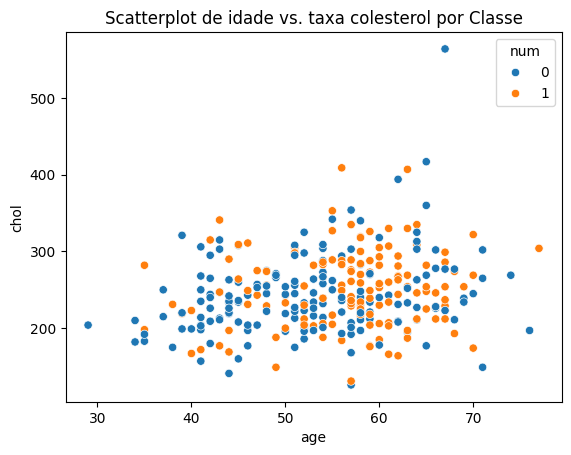

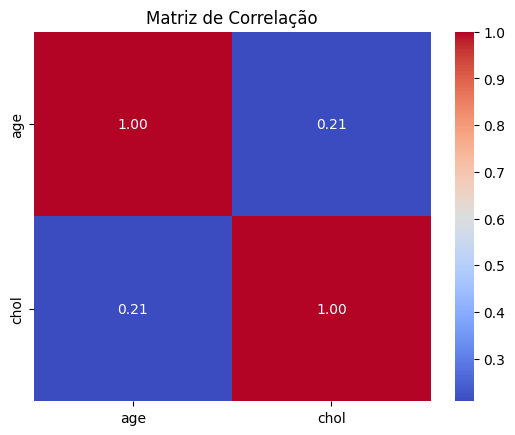

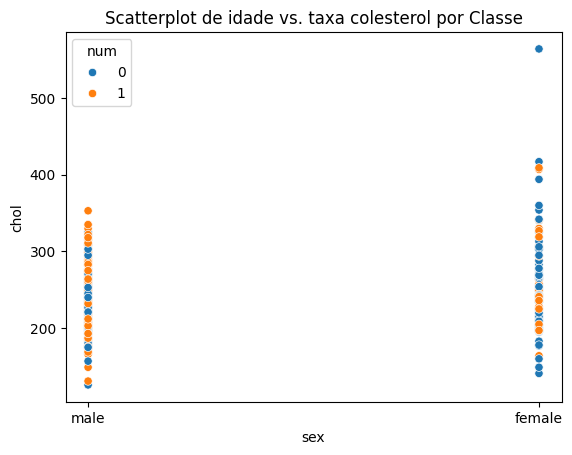

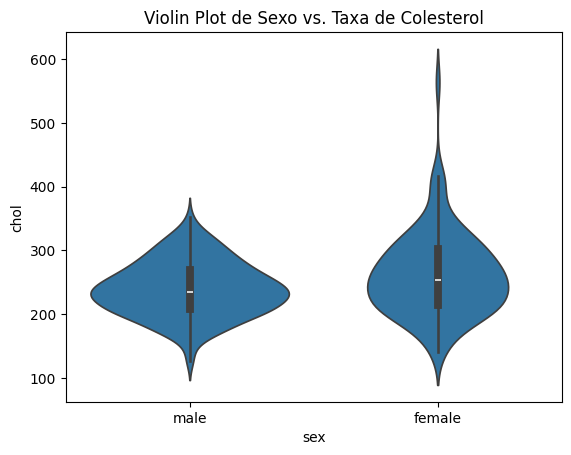

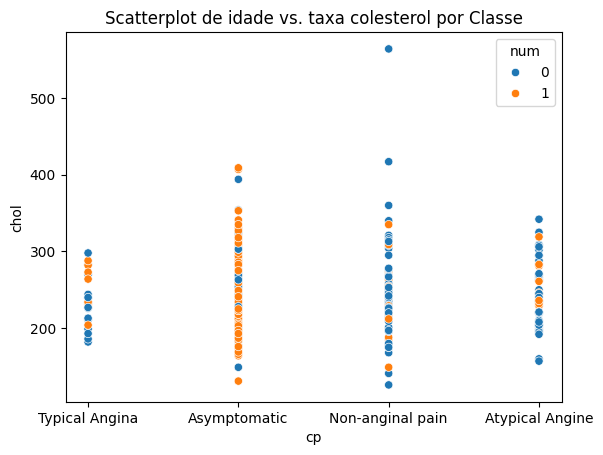

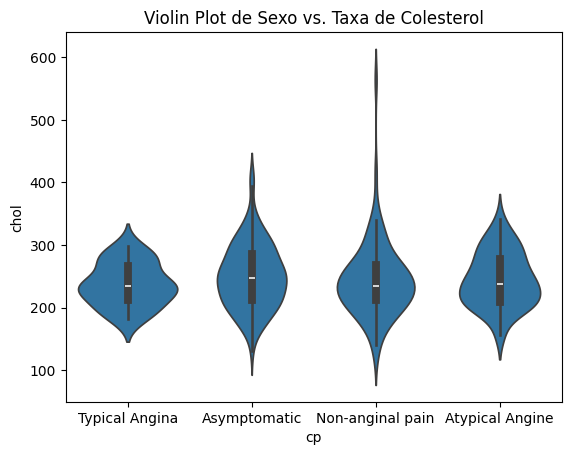

Resultado do teste t de Student: TtestResult(statistic=-3.539847931068439, pvalue=0.00046366126478136847, df=301.0)


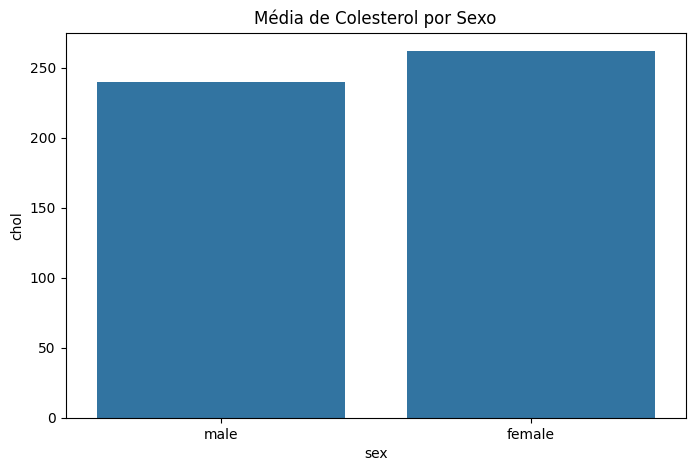

' **d)** Reanalise suas perguntas (hipóteses), é possível respondê-las com a análise realizada? Escreva suas conclusões.\nCaso não seja possível, pense nos motivos, falta de atributos, poucos dados, necessidade de EDA mais profunda?\n\nAnalisando os gráficos de acordo com a média por sexo, com as idades pode-se prever que nem sempre maior idade é indicativo para alta de colesterol.\n\nOs gráficos abaixo mostra a taxa de colesterol e possúi problema casdiaco ou não, isso quer dizer, o número de pessoas com problemas casdiacos não implicam\ntão diretamente a alta de colesterol pois em termos de contagem de cores para "num" = 1 e 0 tem-se que esta equilibrado.\n\nJá alguns gráficos abaixo mostram que existem maior dados homens, isto é significa que tende-se a pensar a analisar um gráfico apenas de sexo e taxa de colesterol\nque os maiores números estão para os homens, porem com a analise desta questão vê-se que as mulheres são bastante afetadas pelo alto indice.\n'

In [92]:
#Pergunta 1 - questão c e d:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Scatterplot e Pairplot - idade taxa de colesterol
sns.scatterplot(x='age', y='chol', hue='num', data=dados)
plt.title('Scatterplot de idade vs. taxa colesterol por Classe')
plt.show()

correlacao = dados[['age', 'chol']].corr()
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

# Scatterplot e Pairplot - sex vs taxa de colesterol
sns.scatterplot(x='sex', y='chol', hue='num', data=dados)
plt.title('Scatterplot de idade vs. taxa colesterol por Classe')
plt.show()

sns.violinplot(x='sex', y='chol', data=dados)
plt.title('Violin Plot de Sexo vs. Taxa de Colesterol')
plt.show()

# Scatterplot e Pairplot - cp vs taxa de colesterol
sns.scatterplot(x='cp', y='chol', hue='num', data=dados)
plt.title('Scatterplot de idade vs. taxa colesterol por Classe')
plt.show()

sns.violinplot(x='cp', y='chol', data=dados)
plt.title('Violin Plot de Sexo vs. Taxa de Colesterol')
plt.show()

# Calcular a média de colesterol por sexo
media_colesterol_por_sexo = data.groupby('sex')['chol'].mean().reset_index()

# Teste t de Student para comparar as médias
resultado_t_test = ttest_ind(dados[dados['sex'] == 'male']['chol'], data[data['sex'] == 'female']['chol'])
print(f'Resultado do teste t de Student: {resultado_t_test}')

# Gráfico de barras para médias
plt.figure(figsize=(8, 5))
sns.barplot(x='sex', y='chol', data=dados, errorbar=None)  # ci=None para não mostrar intervalo de confiança
plt.title('Média de Colesterol por Sexo')
plt.show()

''' **d)** Reanalise suas perguntas (hipóteses), é possível respondê-las com a análise realizada? Escreva suas conclusões.
Caso não seja possível, pense nos motivos, falta de atributos, poucos dados, necessidade de EDA mais profunda?

Analisando os gráficos de acordo com a média por sexo, com as idades pode-se prever que nem sempre maior idade é indicativo para alta de colesterol.

Os gráficos abaixo mostra a taxa de colesterol e possúi problema casdiaco ou não, isso quer dizer, o número de pessoas com problemas casdiacos não implicam
tão diretamente a alta de colesterol pois em termos de contagem de cores para "num" = 1 e 0 tem-se que esta equilibrado.

Já alguns gráficos abaixo mostram que existem maior dados homens, isto é significa que tende-se a pensar a analisar um gráfico apenas de sexo e taxa de colesterol
que os maiores números estão para os homens, porem com a analise desta questão vê-se que as mulheres são bastante afetadas pelo alto indice.
'''








**2. PRÉ-PROCESSAMENTO DOS DADOS**

**a)** Explique qual é a diferença entre **isnull** e **isna** e como voce pode preencher um valor nulo.

**b)** Substitua valores faltantes, padronize os dados, etc. Faça tratamento de atributos categóricos.

**c)** Remova os atributos que achar necessário e justifique.  

**d)** Faça também a seleção dos atributos que achar mais relevantes de acordo com o método de sua preferência. Explique porque os escolheu.


In [95]:
#LETRA A
#print(dados.isnull().sum()) --> resultado mostra apenas zeros
#print(dados.isna().sum()) -->resultado mostra apenas zeros
#Não há diferença prática entre isnull e isna no tratamento de dados de um dataframe
#É possível preencher um valor nulo, se este for numérico, através da estratégia de 'mean
#Caso o valor seja categórico, a estratégia 'most frequent'
#Exemplo:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

print(dados.isnull().sum()) 
print(dados.isna().sum(), "\n\n\n") 

#Neste dataset não há valores nulos então o tratamento de substituição de valores faltantes não fez diferença


#LETRA B

variaveis_num = dados.select_dtypes(include=['int64', 'float64'])
variaveis_cat = dados.select_dtypes(include=['object'])

#Estratégia de mean para numéricos
imputer = SimpleImputer(strategy='mean')

col_num = variaveis_num.select_dtypes(include=['number']).columns
col_char = variaveis_cat.select_dtypes(include=['object']).columns
imputer.fit_transform(variaveis_num[col_num])

variaveis_num[col_num] = imputer.transform(variaveis_num[col_num])


#Conversão de dados categóricos
encoder = LabelEncoder()

dados[col_char] = dados[col_char].apply(encoder.fit_transform)

#Normalização
scaler = MinMaxScaler()

scaler.fit(dados[col_num])

dados[col_num] = scaler.transform(dados[col_num])

print(dados, "\n\n\n")

#LETRA C
#Removendo os atributos com maior variância 
#Deixando apenas os de menor variância para melhor visualização
variancias = dados.var()

top_variancias = variancias.sort_values(ascending=False).head(9)

dados_novos=dados.drop(columns=top_variancias.index)

#Atributos removidos:
print(top_variancias.index, "\n\n\n")

#LETRA D

#Seguindo a lógica do exercício anterior, a seleção dos atributos restantes, os de menor variância foi escolhido
#com base na visualização dos dados. Em dados categóricos alta variância não necessariamente significa diversidade
#de dados e sim alta disperção, dificuldando a interpretação.

print(dados_novos.head())

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64
Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64 



     Unnamed: 0       age  sex  cp  trestbps      chol       fbs  restecg  \
0      0.000000  0.708333    1   3  0.481132  0.244292  0.845242        0   
1      0.003311  0.791667    1   0  0.622642  0.365297  0.260186        0   
2      0.006623  0.791667    1   0  0.245283  0.235160  0.227601        0   
3      0.009934  0.166667    1   2  0.339623  0.283105  0.157463        1   
4      0.013245  0.250000    0   1  0.339623  0.178082  0.352084        0   
..          ...       ...  .

#**3 - Modelagem dos Dados e Avaliação de Desempenho**
Pede-se:
**a)** Usar a função abaixo para classificação da sua base de dados e imprimir os valores de desempenho obtidos.

**b)** Baseado nos resultados do item anterior, calcule o valor de AUC para o melhor classificador?

**c)** Reduzir a dimensionalidade dos dados usando a tecnica PCA mantendo ao menos 90% da variância.

**d)** Verificar e imprimir o desempenho dos classificadores com a redução da dimensionalidade e calcular a porcentagem de variação obtida no desempenho.

In [102]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np


classificadores = {
  "Multi-Layer Perceptron (15,)" : {"modelo": MLPClassifier(random_state=1, hidden_layer_sizes=(15,), max_iter=2000), "scores": []},
  "SVM Polinomial Grau 3" : {"modelo": SVC(kernel='poly', degree=3, gamma=1), "scores": []},
  "Árvore Decisão Critério Gini" : {"modelo": DecisionTreeClassifier(criterion='gini'), "scores": []},
}
X = dados.drop('num', axis=1)
y = dados['num']
for classificador_name in classificadores:

  X, y = train_test_split(X,y, test_size=0.2, stratify=y, random_state=1)
  plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
  modelo = classificadores[classificador_name]["modelo"]
  classificadores[classificador_name]["scores"] = cross_val_score(modelo, X, y, cv=5)
  print("%s: %.2f " % (classificador_name, 100*np.mean(classificadores[classificador_name]["scores"])))

ValueError: too many values to unpack (expected 2)